# Alanine tetrapeptide

In [1]:
root_path = '~/local/OPES-explore/ala4/' # './'

In [2]:
import numpy as np
try: # if pandas is available use it to load files, since it is much faster
    import pandas
    def loadfile(fname, unpack=False, delimiter='\s+', comment='#', dtype=float, skiprows=None, usecols=None):
        data = pandas.read_table(fname, header=None, sep=delimiter, comment=comment, dtype=dtype, skiprows=skiprows, usecols=usecols).to_numpy()
        if unpack == True:
            return (data[:,i] for i in range(data.shape[-1]))
        else:
            return data
except:
    print('+++ pandas not found: loading files will be slower +++')
    loadfile = np.loadtxt

In [3]:
import matplotlib.pyplot as plt
try:
    import fessa
    plt.set_cmap('fessa')
except:
    pass

d_red="#cc0000"    #dark red 1
d_blue="#3C78D8"   #dark cornflower blue 1
d_green="#6AA84F"  #dark green 1
d_orange="#E69138" #dark orange 1
d_purple="#674EA7" #dark purple 1

l_red="#e06666"    #light red 1
l_blue="#6d9eeb"   #light cornflower blue 1
l_green="#93c47d"  #light green 1
l_orange="#f6b26b" #light orange 1
l_purple="#8e7cc3" #light purple 1

<Figure size 432x288 with 0 Axes>

In [4]:
#set bigger font sizes
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIG_SIZE = 16

plt.rc('font', size=SMALL_SIZE)        # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)   # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)  # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)   # fontsize of the figure title

In [5]:
kB = 0.008314462618153239
temp = 300
kbt = kB*temp

methods = ['opes/', 'explore/', 'metad/', 'pbmetad/']
def get_label_color(method):
    if method == 'opes/':
        return 'OPES', d_orange, '-'
    elif method == 'explore/':
        return 'OPES EXPLORE', d_purple, '--'
    elif method == 'metad/':
        return 'METAD', d_green, '-.'
    elif method == 'pbmetad/':
        return 'PBMETAD', d_red, ':'
    elif method == 'metad/nonT-':
        return 'METAD-NONT', l_green, '-'
    elif method == 'metad/ada-':
        return 'METAD-ADA', l_green, '--'
    elif method == 'pbmetad/nonT-':
        return 'PBMETAD-NONT', l_red, '-'
    elif method == 'pbmetad/ada-':
        return 'PBMETAD-ADA', l_red, '--'
    elif method == 'opes/noZ-':
        return 'OPES-NO_ZED', l_orange, '-.'
    elif method == 'explore/noZ-':
        return 'OPES EXPLORE-NO_ZED', l_purple, ':'
    else:
        return method, None, None

In [22]:
def plot_exit_times(ax, methods, opt, std_dev=False, no_ylabel=False, nrep=10):
    basinfile_ = f'{root_path}{method}{opt}-%d/BASINS'
    time = loadfile(basinfile_%0, usecols=[0])
    for method in methods:
        states = np.ones((nrep, len(time))) * 8
        for i in range(nrep): 
            states[i, :] = loadfile(basinfile_%i, usecols=[2])
        av_m = states.mean(axis=0)
        label, color, linestyle = get_label_color(method)
        ax.plot(time, av_m, lw=2.5, linestyle=linestyle, label=label, color=color)
        if std_dev:
            std_m = states.std(axis=0)
            ax.fill_between(time, av_m-std_m, av_m+std_m, alpha=0.1, color=color)
    ax.grid(which='both', linestyle='dashed', alpha=0.5)
    if not no_ylabel:
        ax.set_ylabel('Tot visited states')
    ax.set_xscale('log')
    ax.set_xlim(time[0], time[-1])
    ax.set_xlabel('Time (ps)')

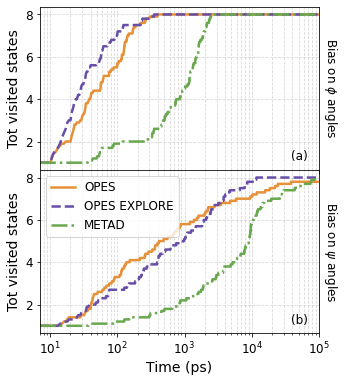

In [23]:
fig = plt.figure()
fig.set_size_inches((5, 6))
gs = fig.add_gridspec(2, hspace=0)
xylabel = 0.9, 0.06
axs = gs.subplots(sharex=True)
ax = axs[0]
plot_exit_times(ax, methods, 'phi-std')
ax.text(*xylabel, '(a)', transform=ax.transAxes)
ax.text(1.01, 0.5, 'Bias on $\phi$ angles', transform=ax.transAxes, va='center', ha='left', rotation=270)
ax = axs[1]
plot_exit_times(ax, methods, 'psi-std')
ax.text(*xylabel, '(b)', transform=ax.transAxes)
ax.text(1.01, 0.5, 'Bias on $\psi$ angles', transform=ax.transAxes, va='center', ha='left', rotation=270)
ax.legend()
# fig.show()
plt.savefig(f'Ala4-states.pdf', bbox_inches='tight')

In [24]:
def plot_4x4grid(methods, figname=None):
    fig = plt.figure()
    fig.set_size_inches((8, 6))
    gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
    xylabel = 0.05, 0.9
    collabel = 0.5, 1.02
    rowlabel = 1.01, 0.5
    axs = gs.subplots(sharex=True, sharey=True)
    ax = axs[0,0]
    plot_exit_times(ax, methods, 'phi-std')
    ax.text(*xylabel, '(a)', transform=ax.transAxes)
    ax.text(*collabel, 'Standard parameters', transform=ax.transAxes, va='bottom', ha='center')
    ax = axs[0,1]
    plot_exit_times(ax, methods, 'phi-agr', no_ylabel=True)
    ax.text(*xylabel, '(b)', transform=ax.transAxes)
    ax.text(*collabel, 'Aggressive parameters', transform=ax.transAxes, va='bottom', ha='center')
    ax.text(*rowlabel, 'Bias on $\phi$ angles', transform=ax.transAxes, va='center', ha='left', rotation=270)
    ax.legend()
    ax = axs[1,0]
    plot_exit_times(ax, methods, 'psi-std')
    ax.text(*xylabel, '(c)', transform=ax.transAxes)
    ax = axs[1,1]
    plot_exit_times(ax, methods, 'phi-agr', no_ylabel=True)
    ax.text(*xylabel, '(d)', transform=ax.transAxes)
    ax.text(*rowlabel, 'Bias on $\psi$ angles', transform=ax.transAxes, va='center', ha='left', rotation=270)
    if figname is not None:
        plt.savefig(figname, bbox_inches='tight')
    plt.show()

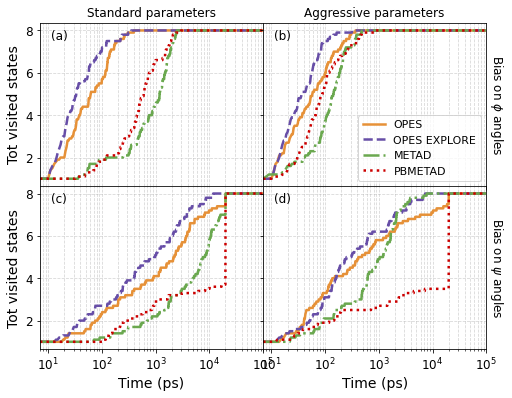

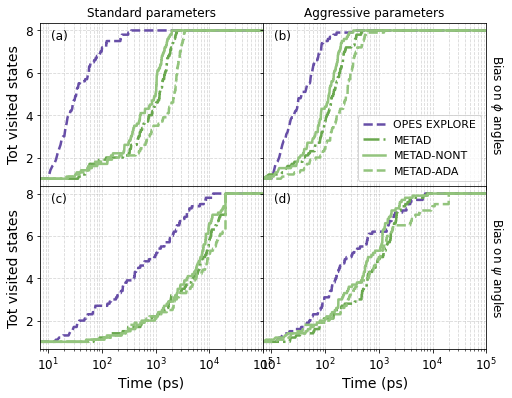

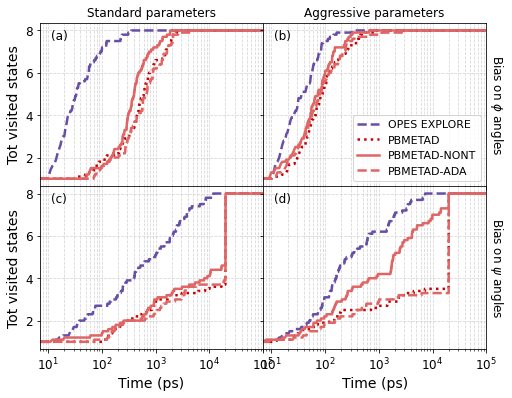

In [25]:
plt.rc('legend', fontsize=11)
plot_4x4grid(['opes/', 'explore/', 'metad/', 'pbmetad/'], figname='Ala4-states_all.pdf')
plot_4x4grid(['explore/', 'metad/', 'metad/nonT-', 'metad/ada-'], figname='Ala4-states_metad.pdf')
plot_4x4grid(['explore/', 'pbmetad/', 'pbmetad/nonT-', 'pbmetad/ada-'], figname='Ala4-states_pb.pdf')
plot_4x4grid(['opes/', 'explore/', 'opes/noZ-', 'explore/noZ-'], figname='Ala4-states_noZ.pdf')
plt.rc('legend', fontsize=SMALL_SIZE)

In [32]:
def plot_exploration(method, label=None, run='psi-std-0', ax=None):
    filename = f'{root_path}{method}{run}/COLVAR'
    phi = loadfile(filename, usecols=[1,2,3])[::2,:]
    state = np.ones(len(phi))
    for j in range(3):
        state += np.where(phi[:,j]>0, 2**j, 0)
    if ax is None:
        ax = plt.axes(projection="3d")
    ax.scatter3D(phi[:,0], phi[:,1], phi[:,2], c=state, cmap='Dark2', marker='.', vmin=1, vmax=8)
    ax.set_xlim([-np.pi, np.pi])
    ax.set_ylim([-np.pi, np.pi])
    ax.set_zlim([-np.pi, np.pi])
    ax.set_xlabel('$\phi_1$')
    ax.set_ylabel('$\phi_2$')
    ax.set_zlabel('$\phi_3$')
    if label is None:
        label = method
    ax.set_title(label)

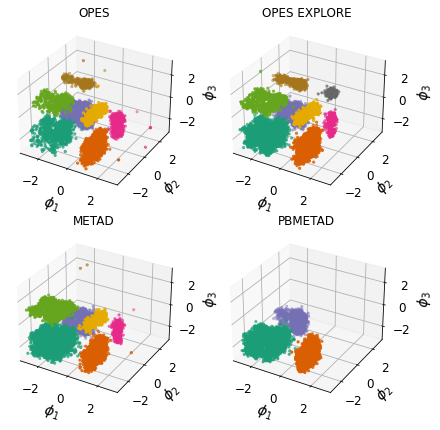

In [33]:
methods = ['opes/', 'explore/', 'metad/', 'pbmetad/']
labels = ['OPES', 'OPES EXPLORE', 'METAD', 'PBMETAD']
fig = plt.figure(figsize=(7, 7))
for m in range(len(methods)):
    ax = fig.add_subplot(2, 2, 1+m, projection='3d')
    plot_exploration(methods[m], labels[m], ax=ax)
plt.show()